# A Simple Linear Regression Model Notebook for the Wallaroo Platform
This model will predict whether or not the room is occupied based on the data from sensors to detect people in a room.

## A Comprehensive Tutorial for:

1. Building a Linear Regression Model
2. Deploying the Model into Wallaroo
3. Using Wallaroo's Monitoring Capabilities to Analyze the Model.

### The data was used from GC Wkshps

https://archive.ics.uci.edu/ml/datasets/Room+Occupancy+Estimation

Adarsh Pal Singh, Vivek Jain, Sachin Chaudhari, Frank Alexander Kraemer, Stefan Werner and Vishal Garg, "Machine Learning-Based Occupancy Estimation Using Multivariate Sensor Nodes," in 2018 IEEE Globecom Workshops (GC Wkshps), 2018. 

### Table of Contents
* [Building a Simple Linear Regression Model](#build)
    * [Sensors used to collect data](#sensor)
    * [Importing the Necessary Python Libraries](#pylib)
    * [Importing the Data Set using Pandas](#data)
    * [Pulling our Independent (x) and Dependent (y) Variables from the DataFrame](#variable)
    * [Splitting the Data Set into Testing and Training Subsets](#test_train)
    * [Creating the Linear Regression Model using Sklearn and Fitting our Training Data to the Model](#make_model)
    * [Predicting the Room Occupancy from our Independent Variable Test Set](#predict)
    * [Finding the Metrics to Analyze the Prediction](#metrics)
    * [Plotting the Linear Regression](#plot)
* [Deploying the Model into Wallaroo](#wallaroo)
    * [Converting the Sklearn Model into Onnx for use on the Wallaroo Platform](#onnx)
    * [Implementing into Wallaroo](#implement)
    * [Creating a Pipeline and Uploading the Model](#pipeline)
    * [Adding Validation to the model](#validation)
    * [Adding Post-Process](#postprocess)
* [Using Wallaroo's Monitoring Capabilities to Analyze the Model.](#analyze)
    * [Deploying the Model](#deploy)
    * [Checking the deployment](#check)
    * [Making an Inference](#inference)
    * [Extracting data](#extract)
    * [Getting Single Datums](#datums)
    * [Making the inference](#makeinference)
    * [Interpreting the Inference](#interpret)
    * [Format Results](#results)
    * [Undeploy the pipeline](#undeploy)
    * [Logs](#logs)

## Steps

### Building a Simple Linear Regression Model <a class="anchor" id="build"></a>

This model will be built from a data set of sensor values and the occupancy of the room the sensors are in.

The goal is to use the sensor data to predict the room occupancy.

#### Sensors used to collect data <a class="anchor" id="sensor"></a>
- `Temperature` - Four sensors that measured temperature in the room
- `Light` -  Four sensors that measured light in the room
- `Sound` - Four sensors that measured sounds in the room
- `CO2` - Two sensors that measured carbon dioxide in the room
- `PIR` - Two sensors that measured motion in the room

#### Importing the Necessary Python Libraries <a class="anchor" id="pylib"></a>
- `matplotlib` - for data visualization
- `numpy` - for data tuning
- `sklearn` - for creating the linear regression model and metrics of the model
- `pandas` - for csv importing
- `onnx` - for converting model

In [1]:
# Code Source: Us

# Needed for data visualization
import matplotlib.pyplot as plt

# Needed for data tuning
import numpy as np

# Needed for creating the linear regression model
from sklearn import linear_model

# Needed for metrics of the model
from sklearn.metrics import mean_squared_error, r2_score

# Needed for csv importing
import pandas as pd

### Importing the Data Set using Pandas <a class="anchor" id="data"></a>
The first step creating a linear regression model is read in the dataset using the pandas library  
The `read_csv` method is responsible for reading in the data and `head()` method acesses the first few rows in the data  

In [2]:
# Reading and displaying the dataset
data = pd.read_csv('Occupancy_Estimation.csv')
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


### Selecting Features and Dependent Variable <a class="anchor" id="variable"></a>

Next we will select our dependent varible `Room_Occupancy_Count` from our dataset which we will store in Y. 

In order to select our set of features, we are going to use forward feature selection which is a part of sklearn's feature_selection module. We start by initializing X with all available features.

In [3]:
Y = data['Room_Occupancy_Count'].values
print("The dependent variable matrix: \n{}\n".format(Y))
vars = [c for c in data.columns if c not in ['Date', 'Time', 'Room_Occupancy_Count']]

X = data.loc[:, vars]
print("The matrix of features: \n{}\n".format(X))


The dependent variable matrix: 
[1 1 1 ... 0 0 0]

The matrix of features: 
       S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
0        24.94    24.75    24.56    25.38       121        34        53   
1        24.94    24.75    24.56    25.44       121        33        53   
2        25.00    24.75    24.50    25.44       121        34        53   
3        25.00    24.75    24.56    25.44       121        34        53   
4        25.00    24.75    24.56    25.44       121        34        54   
...        ...      ...      ...      ...       ...       ...       ...   
10124    25.06    25.13    24.69    25.31         6         7        33   
10125    25.06    25.06    24.69    25.25         6         7        34   
10126    25.13    25.06    24.69    25.25         6         7        34   
10127    25.13    25.06    24.69    25.25         6         7        34   
10128    25.13    25.06    24.69    25.25         6         7        34   

       S4_Light  S1_Sou

Now that we have our pandas arrays with our dependent Y variable and our available features, we will apply SequentialFeatureSelector from sklearn in the forward direction in order to obtain our set of features. For this model, we chose to use 4 features.

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# create the model to use as the estimator for feature selection
initial_model = LinearRegression()

sfs_forward = SFS(initial_model, n_features_to_select = 4, direction = "forward").fit(X, Y)

# extract the selected features from the model
selected = sfs_forward.get_feature_names_out()
selected

array(['S1_Light', 'S5_CO2', 'S5_CO2_Slope', 'S7_PIR'], dtype=object)

**Nina added the below line of code**

In [39]:
# these are the indices of the above features
selected_indices = sfs_forward.get_support(indices=True)
selected_indices

array([ 4, 12, 13, 15])

SequentialFeatureSelector chose `S1_Light`, `S5_CO2`, `S5_CO2_Slope`, `S7_PIR` as the features that best predicted our dependent variable. We will not extract the data of these columns as our new matrix of features which we will store in X_pruned.

In [5]:
# reduce matrix X to include only the selected features
X_pruned = X.loc[:, selected].values
X_pruned

array([[121.        , 390.        ,   0.76923077,   0.        ],
       [121.        , 390.        ,   0.64615385,   0.        ],
       [121.        , 390.        ,   0.51923077,   0.        ],
       ...,
       [  6.        , 345.        ,   0.        ,   0.        ],
       [  6.        , 345.        ,   0.        ,   0.        ],
       [  6.        , 345.        ,   0.        ,   0.        ]])

### Plotting our selected features

Here we utilize `seaborn` to access `pairplot`.

We load a pairplot with our selected features. We use `hue` to ensure that the color of our plots correlate to the `Room_Occupancy_Count`.

The palette of our plot is arbitrary but we will use rainbow.

---
The plot shows each variable correlated with eachother. We would like to see that our model is not utilizing variables that are highly correleted. 

#### From Nina:
Maybe reword as  :
"The plot shows the relationship of each pair of variables. We would like to see that the model is not using  variables that are highly correlated with each other; the plots show that it is not." 
(Because otherwise the plot would be a diagonal line)
---

The diagonal of the graph shows the variables with itself.

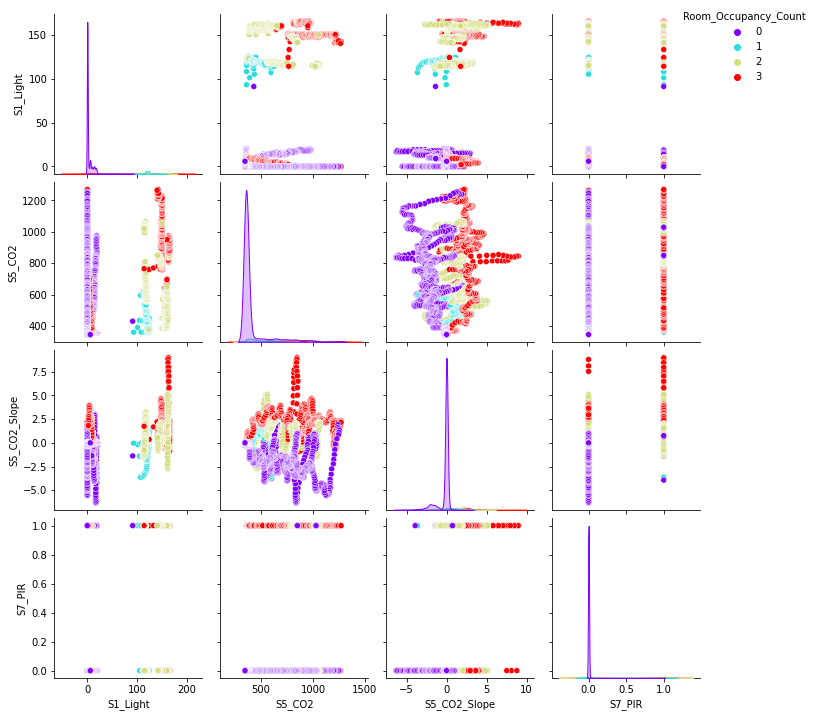

In [6]:
#seaborn import
import seaborn as sns

#get the columns of data we want to see in a graph
plot_data = data[['S1_Light', 'S5_CO2', 'S5_CO2_Slope', 'S7_PIR', 'Room_Occupancy_Count']]

#creating a pairplot of the data
plot = sns.pairplot(data = plot_data,hue='Room_Occupancy_Count', palette="rainbow")
sns.move_legend(plot, 'upper left', bbox_to_anchor=(.8,1)) 

### Showing Correlation of Variables to the Room Count

In the next two graphs we show two variables and the density of their outputs related to their inputs.

In the `S5_CO2` plot, we can see that as the CO2 levels rise, we generally are seeing higher occupancy count (Keep in mind the overlap is not optimal, but when we add multiple variables together, we should see a better result).

However, in the `S1_Sound` plot, we are seeing a high amount of zero counts, along with overlapping density mappings for the other values. This shows that the variable `S1_Sound` is not the best variable to use in our model.


#### Comment from Nina
This is a very nice choice of variables! I like that you looked at one variable that the model selection algorithm picked, and another one that it did not.
Maybe call this section "Showing the Relationship of Variables to the Room Count" ?

Also for the comment above:
> However, in the S1_Sound plot, we are seeing a high amount of zero counts, along with overlapping density mappings for the other values. This shows that the variable S1_Sound is not the best variable to use in our model.

You're actually not seeing a high amount of zero counts, you're seeing that the S1_Sound reading is concentrated near zero when there is no one in the room (which makes sense, right?). And yes, that fact that the distributions overlap so perfectly for counts 1,2,3 means that this sensor can't differentiate how many people are in the room.



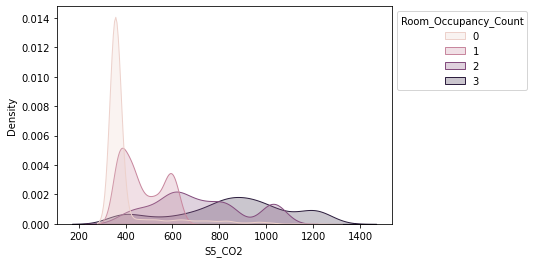

In [7]:
#Show a density plot of co2
co2_plot = sns.kdeplot(data=plot_data, x='S5_CO2', hue='Room_Occupancy_Count', common_norm=False, fill=True)
sns.move_legend(co2_plot, 'upper left', bbox_to_anchor=(1,1)) 

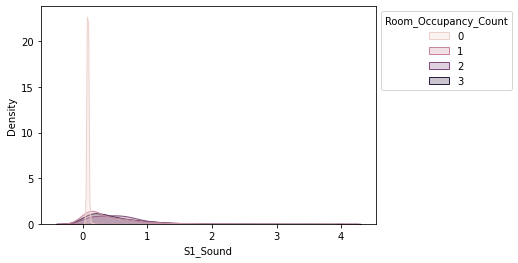

In [8]:
#Show a density plot of S1_Sound
sound_plot = sns.kdeplot(data=data, x='S1_Sound', hue='Room_Occupancy_Count', common_norm=False, fill=True)
sns.move_legend(sound_plot, 'upper left', bbox_to_anchor=(1,1)) 

#### Splitting the Data Set into Testing and Training Subsets <a class="anchor" id="test_train"></a>
Next we use the `train_test_split()` method in the sklearn library to split the data into test and train sets. 

Then we use train_test_split which sets test/train data into x and y. 

Create test and train datasets with 0.2 (20%) of the dataset being test data.

The `random_state` decides which indices of data to pull from.


In [9]:
from sklearn.model_selection import train_test_split

# TWe pass X_pruned and Y to train_test_split as the data to be split
# Create test and train datasets with 0.2 (20%) of the dataset being test data
# The random_state decides which indices of data to pull from
x_train, x_test, y_train, y_test = train_test_split(X_pruned, Y, test_size = 0.2, random_state = 1)

#### Creating the Linear Regression Model using Sklearn and Fitting our Training Data to the Model <a class="anchor" id="make_model"></a>
Now using `LinearRegression()` method we create a linear regression object which we call `regr`.

Then we take `.fit(x_train, y_train)` method uses x and y train data as parameters to see how well it fits the model.

In [10]:
# Creating the linear regression object
occupancy_model = LinearRegression()

# The regr.fit() measures how well the x and y train data fit the model
occupancy_model.fit(x_train, y_train)

LinearRegression()

#### Predicting the Room Occupancy from our Independent Variable Test Set <a class="anchor" id="predict"></a>
In this step we take in the independent variable test set for a the parameter in the `predict()` method in order to predict the outcome for the dependent variable.

In [11]:
# The regr.predict() creates a prediction based on the x test data
y_pred = occupancy_model.predict(x_test)

#### Finding the Metrics to Analyze the Prediction <a class="anchor" id="metrics"></a>
In this step we use various functions and methods in order to see how well our linear regression model is predicting our data. 

The  `coef_` function tells us the **correlation coefficient**, which shows in what way our variables correlate with each other. 

Next up we have the `mean_squared_error()` method, which shows us the distance from the estimated values and the true values; The best possible score would be 0.

Lastly there's the `r2_score()` method which is responsible for displaying how well our data fits the current model, with an R^2 score of 1.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Prints the coefficients
print("Coefficients: \n", occupancy_model.coef_)

# Prints the mean squared error
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

# Prints the coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.00731217 0.00133132 0.22333816 0.64578099]
Root mean squared error: 0.36
Coefficient of determination: 0.85


### Deploying the Model into Wallaroo <a class="anchor" id="wallaroo"></a>
The model that was created will now be deployed into the Wallaroo platform.

#### Converting the Sklearn Model into Onnx for use on the Wallaroo Platform <a class="anchor" id="onnx"></a>
For the next step refer to [sklearn-regression-to-onnx tutorial](https://docs.wallaroo.ai/wallaroo-tutorials/conversion-tutorials/sklearn-regression-to-onnx/) in the wallaroo documentation for how to convert file to onnx.

In [14]:
# Used to load the sk-learn model
import pickle

# Used for the conversion process
import onnx, skl2onnx, onnxmltools
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx.common.data_types import DoubleTensorType

In [15]:
# The model_to_onnx converts the model to onnx to be upload to Wallaroo Platfrom
# For more detailed steps refer to "model_conversion"
def model_to_onnx(model, cols, *, input_type='Double'):
    input_type_lower=input_type.lower()
    # How to manage float values
    if input_type=='Double':
        tensor_type=DoubleTensorType
    elif input_type=='Float':
        tensor_type=FloatTensorType
    else:
        raise ValueError("bad input type")
    tensor_size=cols
    initial_type=[(f'{input_type_lower}_input', tensor_type([None, tensor_size]))]
    onnx_model=onnxmltools.convert_sklearn(model,initial_types=initial_type)
    return onnx_model

In [16]:
# The model_to_onnx() takes the pickle file and converts it to onnx
onnx_model_converted = model_to_onnx(occupancy_model, 4)

# The onnx.save_model() saves the converted model into a file
onnx.save_model(onnx_model_converted, "occupancy_model.onnx")

### Implementing into Wallaroo <a class="anchor" id="implement"></a>
Reference the [Wallaroo 101 Tutorial](https://docs.wallaroo.ai/wallaroo-101/) for how to access the wallaroo platform

In [17]:
# Needed for the use of Wallaroo
import wallaroo

# The wallaroo.Client() allows the file to access wallaroo platform
wl = wallaroo.Client()

Please log into the following URL in a web browser:

	https://sparkly-apple-3026.keycloak.wallaroo.community/auth/realms/master/device?user_code=LEOI-QTNB

Login successful!


In [18]:
# Creates the name for workspace, pipeline, and model
workspace_name = 'multivariable'
pipeline_name = 'occupancymultivarpipeline'
model_name = 'occupancymultivarmodel'

# Created to fetch the model
model_file_name = 'occupancy_model.onnx'

In [19]:
# The get_workspace() gets/create the workspace when needed
# For more detailed steps refer to "wallaroo-101"
def get_workspace(name):
    workspace = None
    for ws in wl.list_workspaces():
        if ws.name() == name:
            workspace= ws
    if(workspace == None):
        workspace = wl.create_workspace(name)
    return workspace

# The get_pipeline() gets/create the pipeline when needed
# For more detailed steps refer to "wallaroo-101"
def get_pipeline(name):
    try:
        pipeline = wl.pipelines_by_name(pipeline_name)[0]
    except EntityNotFoundError:
        pipeline = wl.build_pipeline(pipeline_name)
    return pipeline

In [20]:
# Calls function to create workspace
workspace = get_workspace(workspace_name)

# The wl.set_current_workspace() sets the workspace to currently being worked on
ws = wl.set_current_workspace(workspace)

In [21]:
# Thw wl.list_workspaces() prints the lists of the workspaces
wl.list_workspaces()

Name,Created At,Users,Models,Pipelines
nina@wallaroo.ai - Default Workspace,2022-11-29 19:01:46,['nina@wallaroo.ai'],0,0
boston-insights-yns,2022-11-29 19:09:00,"['younes.amar@wallaroo.ai', 'nina@wallaroo.ai', 'wani.sharma@wallaroo.ai']",1,1
multivariable,2022-12-01 23:06:08,['nina@wallaroo.ai'],0,0


In [22]:
wl.set_current_workspace(workspace)
#gw = wl.get_current_workspace()

{'name': 'multivariable', 'id': 17, 'archived': False, 'created_by': '74fcae57-8c9b-4b9c-94a4-11f9231ca043', 'created_at': '2022-12-01T23:06:08.118938+00:00', 'models': [], 'pipelines': []}

#### Creating a Pipeline and Uploading the Model <a class="anchor" id="pipeline"></a>
In this step we are using `build_pipeline()`. Here we create the pipeline by giving the method a string. We defined `pipeline_name` earlier.

To upload the model we use `upload_model()`. Here we need give a string, and a file. Both we defined earlier in the tutorial.

Lastly, we add the model as a step to the pipeline using `add_model_step()`. All we have to give here is give the function our model we used earlier.

**Nina added the below line of code (you just forgot to add it)**

In [24]:
occupancy_model_onnx = wl.upload_model(model_name, model_file_name).configure()

In [25]:
# The wl.build_pipeline() creates the pipeline
occupancy_pipeline = wl.build_pipeline(pipeline_name)

# The occuupancy_pipeline.add_model_step() adds the model to pipeline to be deployed
occupancy_pipeline = occupancy_pipeline.add_model_step(occupancy_model_onnx)

#### Adding Validation to the model  <a class="anchor" id="validation"></a>
The `add_validation()` takes in two parameters.  

**add_validation**(**string** name, **bool** condition)  

**Parameters:**
* **Name**: This must be lower-case. It is an arbitrary name used to name the condition.  
* **Condition**: This describes the condition you want to **NOT** mark as an anomaly. First, give the output values and if greater/less/equal to a chosen value.  

The validation step must be implemented before deploying the pipeline and before adding a post process step (In the current version of Wallaroo, this is a work-around to a known issue).  

In our code, we name our validation as `no_negative_people`. The condition takes in our `occupancy_model` outputs and compares it to the `float(0)`. This needs to be a float because `occupancy_model` will output floats. So we are only allowing the values greater than or equal to 0.0 to not be marked as an anomaly.

**Nina had to change the name of the model to occupancy_model_onnx (from occupancy_model)**


In [27]:
occupancy_pipeline = occupancy_pipeline.add_validation(
                                        'no_negative_people',
                                        occupancy_model_onnx.outputs[0][0] >= float(0)
                                        )

#### Adding Post-Process <a class="anchor" id="postprocess"></a>
The post process step formats the data. We are able to implemennt whatever formatting rules we want.

In this tutorial, since we cannot have a fraction of a person, we implement rounding.

Here we are uploading another "model" to our pipeline.

First, we must take our `postproccess.py` file and upload it to Wallaroo using `wl.upload_model()`. We are naming this model `postprocess`. We are also sending our `postprocess.py` file. This time we must also configure it as a python file. 

We then need to add the model to our pipeline using `add_model_step()` as we did before with our model.
Except this time, we upload `module_post`.

In [28]:
module_post = wl.upload_model("postprocess", "./postprocess.py").configure('python')

occupancy_pipeline = occupancy_pipeline.add_model_step(module_post)

### Using Wallaroo's Monitoring Capabilities to Analyze the Model <a class="anchor" id="analyze"></a>
Since the model is now deployed we will continue to monitor it and analyze it.

#### Deploying the Model <a class="anchor" id="deploy"></a>
We are close to the final step now. Here we utilize Wallaroo's amazing cluster to run our pipeline.

In [29]:
# The occupancy_pipeline.deploy() activating the pipeline
occupancy_pipeline.deploy()

Waiting for deployment - this will take up to 45s ........ ok


name,occupancymultivarpipeline
created,2022-12-01 23:06:14.558534+00:00
last_updated,2022-12-01 23:17:50.118126+00:00
deployed,True
tags,
versions,"d980041f-bf18-449d-9dff-e4352b58c14b, 7c7092b3-617e-4b7a-ae20-d8d51b7b859d, ae910252-2704-4ff6-b885-3b4e3c33d3e5"
steps,occupancymultivarmodel


#### Checking the deployment <a class="anchor" id="check"></a>
This can be a usefull line of code, to ensure that the pipeline is running succesfully!

In [30]:
# The occupancy_pipeline.status() displays the status of the pipeline
occupancy_pipeline.status()

{'status': 'Running',
 'details': [],
 'engines': [{'ip': '10.48.0.62',
   'name': 'engine-78797d5c86-nscsl',
   'status': 'Running',
   'reason': None,
   'details': [],
   'pipeline_statuses': {'pipelines': [{'id': 'occupancymultivarpipeline',
      'status': 'Running'}]},
   'model_statuses': {'models': [{'name': 'postprocess',
      'version': '4514a06d-6512-43ef-a52c-76a9e13c0412',
      'sha': '2b2f45afdc9a628829b347d914d87e60d61aeac63455f95bc9307953e190e3c3',
      'status': 'Running'},
     {'name': 'occupancymultivarmodel',
      'version': '015146b2-6ed8-455c-a395-28f9ee5c43a1',
      'sha': '59e1d2b420f57e6f999c48b205f515e1eeb3f22c06162b3c0f68cf18ddcd5422',
      'status': 'Running'}]}}],
 'engine_lbs': [{'ip': '10.48.1.83',
   'name': 'engine-lb-8d5c8cb76-d8zw9',
   'status': 'Running',
   'reason': None,
   'details': []}],
 'sidekicks': []}

#### Making an Inference <a class="anchor" id="inference"></a>

Finally, we get to utilize all of our work and put it into production.

In this first box, we are just implementing a function that will format our data into a dictionary format. This format is needed in order to properly run inferences.

#### Getting Single Datums <a class="anchor" id="datums"></a>

Here we just need to grab the data from our .csv that we want to infer upon.

In our setting, we will pretend that our sensors are sending our pipeline a single datum at a time. In our scenrio, we will send a good datum (something that won't trigger a validation error) and we will also send a bad datum (something that will trigger a validation error).

In [2]:
# Needed for the infrences
import json
from wallaroo.object import EntityNotFoundError

# The pandas_to_dict() converts the values into dictionary for infrences
def pandas_to_dict(df):
    input_dict = {
    'tensor': df.to_numpy().tolist()
    }
    return input_dict

# Nina changed this, see block below
# good_data = pandas_to_dict(pd.read_csv('Good_Datum.csv').iloc[:,[2, 6, 10, 14]])
# bad_data = pandas_to_dict(pd.read_csv('Bad_Datum.csv').iloc[:10,[2, 6, 10, 14]])

good_data = pandas_to_dict(pd.read_csv('Good_Datum_V2.csv').iloc[:,selected_indices])
bad_data = pandas_to_dict(pd.read_csv('Bad_Datum_V2.csv').iloc[0:10,selected_indices])

## Nina says -- these shouldn't be the same, right? You were tweaking the wrong set of variables, I think.
print(good_data)
print(bad_data)

ModuleNotFoundError: No module named 'wallaroo'

**All below is Nina stuff**

In [49]:
pd.read_csv("Good_Datum.csv")

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1


In [51]:
pd.read_csv("Bad_Datum.csv")

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,-121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1


In [41]:
# these are the values you should be using, not the [2, 6, 10, 14] above, right?
pd.read_csv('Good_Datum.csv').iloc[:, selected_indices]


,S3_Temp,S3_Sound,S4_Sound,S5_CO2_Slope
0,24.56,0.06,0.06,0.769231


In [3]:
pd.read_csv('Bad_Datum.csv').iloc[:, selected_indices]

NameError: name 'pd' is not defined

#### Making the inference <a class="anchor" id="makeinference"></a>

`occupancy_pipeline.infer()`  
This method takes our input data that we pulled from our data, and creates the inference. 

The result shows the data we placed in, the outputs from the inference, and lastly, our post process step that rounds the numbers.

In [42]:
# # The occupancy_pipeline.infer() creates a result based on data given
# result = occupancy_pipeline.infer(input_dict)
# result

# The occupancy_pipeline.infer() creates a result based on data given
good_result = occupancy_pipeline.infer(good_data)
bad_result = occupancy_pipeline.infer(bad_data)

#### Interpreting the Inference <a class="anchor" id="interpret"></a>

By printing `good_result` and `bad_result` we can see the actual output. On the first line `InferenceResult` it shows `check_failures`.

In our `good_result`, we see that there are no failures. However in `bad_result`, we see that the validation step found a failure.

This result also shows the information that was run. You can find the following information:  
`model_name` - name of the model.  
`orginal_data` - the data we placed into the inference.  
`outputs` - the raw output.  
`prediction` - the output after it has been processed.



In [43]:
print(good_result)
print("-"*100)
print(bad_result)

[InferenceResult({'check_failures': [],
 'elapsed': 632532,
 'model_name': 'postprocess',
 'model_version': '4514a06d-6512-43ef-a52c-76a9e13c0412',
 'original_data': {'tensor': [[24.56, 0.06, 0.06, 0.769230769231]]},
 'outputs': [{'Json': {'data': [{'original': {'outputs': [{'Double': {'data': [0.23613065367591812],
                                                                      'dim': [1,
                                                                              1],
                                                                      'v': 1}}]},
                                 'prediction': [0.0]}],
                       'dim': [1],
                       'v': 1}}],
 'pipeline_name': 'occupancymultivarpipeline',
 'shadow_data': {},
 'time': 1669937679657})]
----------------------------------------------------------------------------------------------------
[InferenceResult({'check_failures': [],
 'elapsed': 480001,
 'model_name': 'postprocess',
 'model_version': '4514a06d-

#### Format Results <a class="anchor" id="results"></a>

`result[0].data()[0].tolist()`  
This will show the prediction of our inference result.

In [52]:
# Show the results in a nicely formatted way.
print("Finalized Data\n--------------------")
print("Good Result :",good_result[0].data()[0].tolist())
print("Bad Result :",bad_result[0].data()[0].tolist())

Finalized Data
--------------------
Good Result : [0.0]
Bad Result : [0.0]


#### Undeploy the pipeline <a class="anchor" id="undeploy"></a>

This part is crucial, you do not want take up more resources than you meant to. 

In [53]:
# The occupancy_pipeline.undeploy() deactivates the pipeline
occupancy_pipeline.undeploy()

Waiting for undeployment - this will take up to 45s ..................................... ok


name,occupancymultivarpipeline
created,2022-12-01 23:06:14.558534+00:00
last_updated,2022-12-01 23:17:50.118126+00:00
deployed,False
tags,
versions,"d980041f-bf18-449d-9dff-e4352b58c14b, 7c7092b3-617e-4b7a-ae20-d8d51b7b859d, ae910252-2704-4ff6-b885-3b4e3c33d3e5"
steps,occupancymultivarmodel


#### Logs <a class="anchor" id="logs"></a>

`.logs()`

Lastly, the pipeline logs can be deployed, even after the pipeline is undeployed.

We can see both good and bad datums being represented in the logs.  
A log without an anomaly will be shown in white.  
A log with an anomaly will be shown in red. It will also list how many anomalies were found in the last column.

In [54]:
logs = occupancy_pipeline.logs()
logs

Timestamp,Output,Input,Anomalies
2022-01-Dec 23:18:17,[array([252.])],"[[24.94, 121.0, 0.08, 390.0]]",0
2022-01-Dec 23:18:17,[array([251.])],"[[24.94, -121.0, 0.08, 390.0]]",0
2022-01-Dec 23:34:39,[array([0.])],"[[24.56, 0.06, 0.06, 0.769230769231]]",0
2022-01-Dec 23:34:39,[array([0.])],"[[24.56, 0.06, 0.06, 0.769230769231]]",0
